## Import the libraries

In [133]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import math
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer, SimpleImputer
import seaborn as sns
from sklearn.metrics import jaccard_score, log_loss, mutual_info_score, accuracy_score, confusion_matrix, classification_report

## Load the data

In [77]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

### Check the null values

In [79]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Drop the null values from Gender and Married column

I dropped Gender and Married columns null values because it cannot be used Imputer techniques for these variable.

In [80]:
df.dropna(subset=['Gender', 'Married'], inplace=True)

In [6]:
#Check unique values of each columns
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column,df[column].unique()))

Column: Loan_ID - Unique Values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001052'
 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087' 'LP001091'
 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106' 'LP001109'
 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120' 'LP001123'
 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225' 'LP001228'
 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248'
 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259' 'LP001263'
 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273' 'LP001275'
 'LP001279' 'LP001280' 'LP001

## Drop Loan_ID column

I dropped Loan_ID column because it cannot be used as a predictor.

In [81]:
df.drop(columns= 'Loan_ID', inplace=True)

In [82]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Visualization

I visualize the Loan Rate

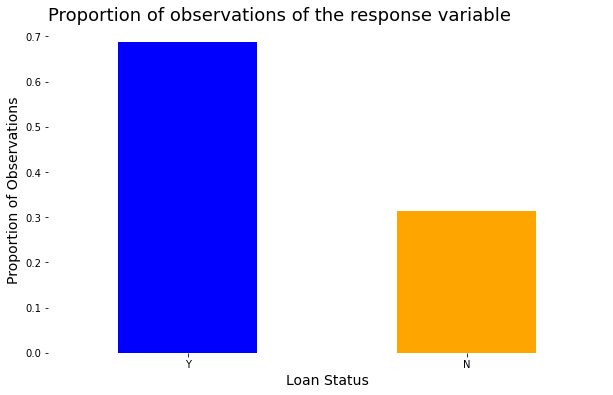

In [63]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#proprotion of observation of each class
prop_obs = df['Loan_Status'].value_counts(normalize=True)

prop_obs.plot(kind = 'bar',
             ax = ax,
              color = ['blue', 'orange']
             )
ax.tick_params(rotation = 'auto')

#Set title and label
plt.title ('Proportion of observations of the response variable',
             fontsize=18, loc='left')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Proportion of Observations', fontsize=14)

#eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom','left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

### Interpretation of the Loan Status

Approximately %70 percentage of the loan was approved, and %30 percentage of them was rejected.

### Stacked Plot for Demographic Information

I define a method to draw a graphics about the demographic variable.

In [11]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''Parameters:
    
            columns_to_plot: (list of string): Names of the variables to plot
            super_title (string): Super title of the visualization
    '''
    num_of_columns = 2
    num_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #Create figure
    fig = plt.figure(figsize=(12,7*num_of_rows))
    fig.suptitle(super_title, fontsize=22, y = .95)
    
    #loop the each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        #create a subplot
        ax = fig.add_subplot(num_of_rows, num_of_columns,index)
        
        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Loan_Status']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['blue','orange'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Loan Status', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

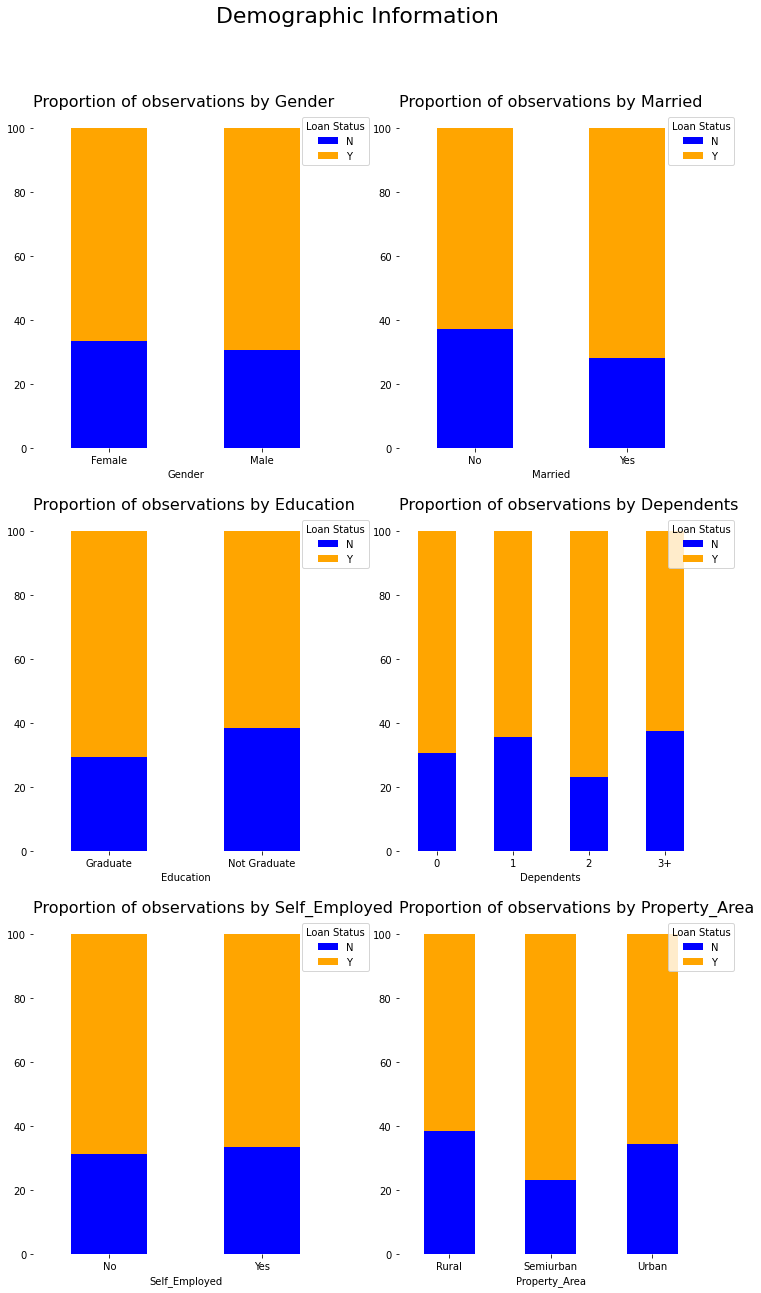

In [12]:
# demographic column names
demographic_columns = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

### Interpretation of the demographic data

The %80 percent of people who is two year dependent and living in the Semi-Urban Area can get loan. Other variable didn't differ from other options.  

In [83]:
df_transformed = df.copy()
df_transformed.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Transform the string to numeric

I used Label Encoder to transform the string to integer

In [87]:
df_transformed['Dependents'] = df_transformed['Dependents'].str.replace('3+', '3', regex = False)

In [88]:
df_transformed['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [84]:
le=preprocessing.LabelEncoder()
label_encoding_columns = ('Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status')
for column in label_encoding_columns:
    df_transformed[column] = le.fit_transform(df_transformed[column])


In [85]:
df_transformed.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column,df_transformed[column].unique()))

Column: Gender - Unique Values: [1 0]
Column: Married - Unique Values: [0 1]
Column: Dependents - Unique Values: ['0' '1' '2' '3+' nan]
Column: Education - Unique Values: [0 1]
Column: Self_Employed - Unique Values: [0 1 2]
Column: ApplicantIncome - Unique Values: [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3717  9560
  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828  3667
  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000  1928
  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609  4945
  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846  2395
  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782  2484
  1977  4188  1759  4288  4843 13650  4652  3052 11417  7333  3800  2071
  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667  2137  2957
  3692  3865 10513  6080 20166  2014  2718  3459  4895  3316 14999  4200
  504

In [86]:
df_transformed.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

## Variable types

In [89]:
df_transformed.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

## Transform the Dependent variable string to integer

In [90]:
df_transformed['Dependents'] = pd.to_numeric(df_transformed['Dependents'], downcast='integer', errors='coerce')

## Standardize the variables

In [97]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Handle with the missing Value

I use KNN Imputer in this project. Imputation for completing missing values using k-Nearest Neighbors. Each sample's missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [111]:
imputer = KNNImputer(n_neighbors=5)
df_transformed.iloc[:,:]= imputer.fit_transform(df_transformed)
df_transformed.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [113]:
for column in df_transformed.columns:
    print('Column: {} - Unique Values: {}'.format(column,df_transformed[column].unique()))

Column: Gender - Unique Values: [1. 0.]
Column: Married - Unique Values: [0. 1.]
Column: Dependents - Unique Values: [0.  1.  2.  3.  0.5]
Column: Education - Unique Values: [0. 1.]
Column: Self_Employed - Unique Values: [0. 1. 2.]
Column: ApplicantIncome - Unique Values: [ 5849.  4583.  3000.  2583.  6000.  5417.  2333.  3036.  4006. 12841.
  3200.  2500.  3073.  1853.  1299.  4950.  3596.  3510.  4887.  2600.
  7660.  5955.  3717.  9560.  2799.  4226.  1442.  3750.  4166.  3167.
  4692.  3500. 12500.  2275.  1828.  3667.  3748.  3600.  1800.  2400.
  3941.  4695.  3410.  5649.  5821.  2645.  4000.  1928.  3086.  4230.
  4616. 11500.  2708.  2132.  3366.  8080.  3357.  3029.  2609.  4945.
  5726. 10750.  7100.  4300.  3208.  1875.  4755.  5266.  1000.  3333.
  3846.  2395.  1378.  3988.  2366.  8566.  5695.  2958.  6250.  3273.
  4133.  3620.  6782.  2484.  1977.  4188.  1759.  4288.  4843. 13650.
  4652.  3052. 11417.  7333.  3800.  2071.  5316.  2929.  3572.  7451.
  5050. 14583.  2

## Split the dataset train and test data

In [96]:
X = df_transformed.drop(columns='Loan_Status')
y = df_transformed['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=40, shuffle=True)

## Build different model

In [122]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier(n_neighbors=5, metric='euclidean')))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('decision Tree', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=seed)))
   
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [125]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.75)
Classifier: logistic_regression, Accuracy: 0.8)
Classifier: support_vector_machines, Accuracy: 0.8166666666666667)
Classifier: random_forest, Accuracy: 0.775)
Classifier: decision Tree, Accuracy: 0.8083333333333333)
Classifier: gradient_boosting, Accuracy: 0.7583333333333333)


###  Interpretation of the Algorithm results:
    The best accuracy score was given from Support Vector Machine.

In [141]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Support Vector Machine Jaccard Score is {}.".format(jaccard_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(log_loss(y_test,y_pred))

Support Vector Machine Jaccard Score is 0.7864077669902912.
[[17 18]
 [ 4 81]]
6.332228945348154


In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.49      0.61        35
         1.0       0.82      0.95      0.88        85

    accuracy                           0.82       120
   macro avg       0.81      0.72      0.74       120
weighted avg       0.82      0.82      0.80       120



## Interpretation of the SVC Results

Sensitivity is 0.95, Specificity is 0.81. Also Accuracy score is 0.82. So I can say that SVC is the best classifier for Credit Loan Status for this dataset.